<a href="https://colab.research.google.com/github/lmlouis/IntroductionIA/blob/main/Arbre_decision_TItanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Decision Tree
output = catégorielle / numérique (discrete)

prédit soit une classification soit une regression 

In [52]:
from google.colab import drive # import google colab 
drive.mount('/gdrive') # importer google drive 


import os

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [54]:
dataPath = '/gdrive/MyDrive/Gomycode /Introduction a IA /cours 4/checkpoint/titanic-passengers.csv'

In [55]:
#Importing our dataset from csv file
import pandas as pd 
dataset=pd.read_csv(dataPath, sep=";")

#Preprocessing our data
def preprocess_data(new_data):
    new_data['Age'].fillna(new_data['Age'].mean(),inplace=True)
    new_data.replace({'Sex':{'male': 1,'female':0}},inplace=True)
    new_data['Cabin']=new_data.Cabin.fillna('G6')
    new_data.replace({'Survived':{'Yes': 1,'No':0}},inplace=True)
    return new_data
data=preprocess_data(dataset)

# Decision Tree Prediction
voir  
[documentation](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[kaggle tree](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial/notebook)

In [56]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [93]:
#features extraction
x=data.drop(["Survived","Name", "Cabin", "Ticket", "Embarked"], axis=1)
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=10)

#applying tree algorithm
treeClassifier = tree.DecisionTreeClassifier()  
treeClassifier.fit(x_train, y_train)   #fitting our model
y_pred=treeClassifier.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7821229050279329


# Tree Visualization 

In [58]:
from matplotlib import pyplot as plt

## export_text
L'exportation de l'arbre de décision vers la représentation textuelle peut être utile lorsque l'on travaille sur des applications sans interface utilisateur ou lorsque l'on souhaite enregistrer des informations sur le modèle dans un fichier texte.

In [59]:
text_representation = tree.export_text(treeClassifier)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- class: 0
|--- feature_1 >  0.50
|   |--- class: 1



on peut sauvegarder l'exportation dans un fichier 

In [60]:
with open("decision_tree.log", "w") as fout:
    fout.write(text_representation)

##  plot_tree

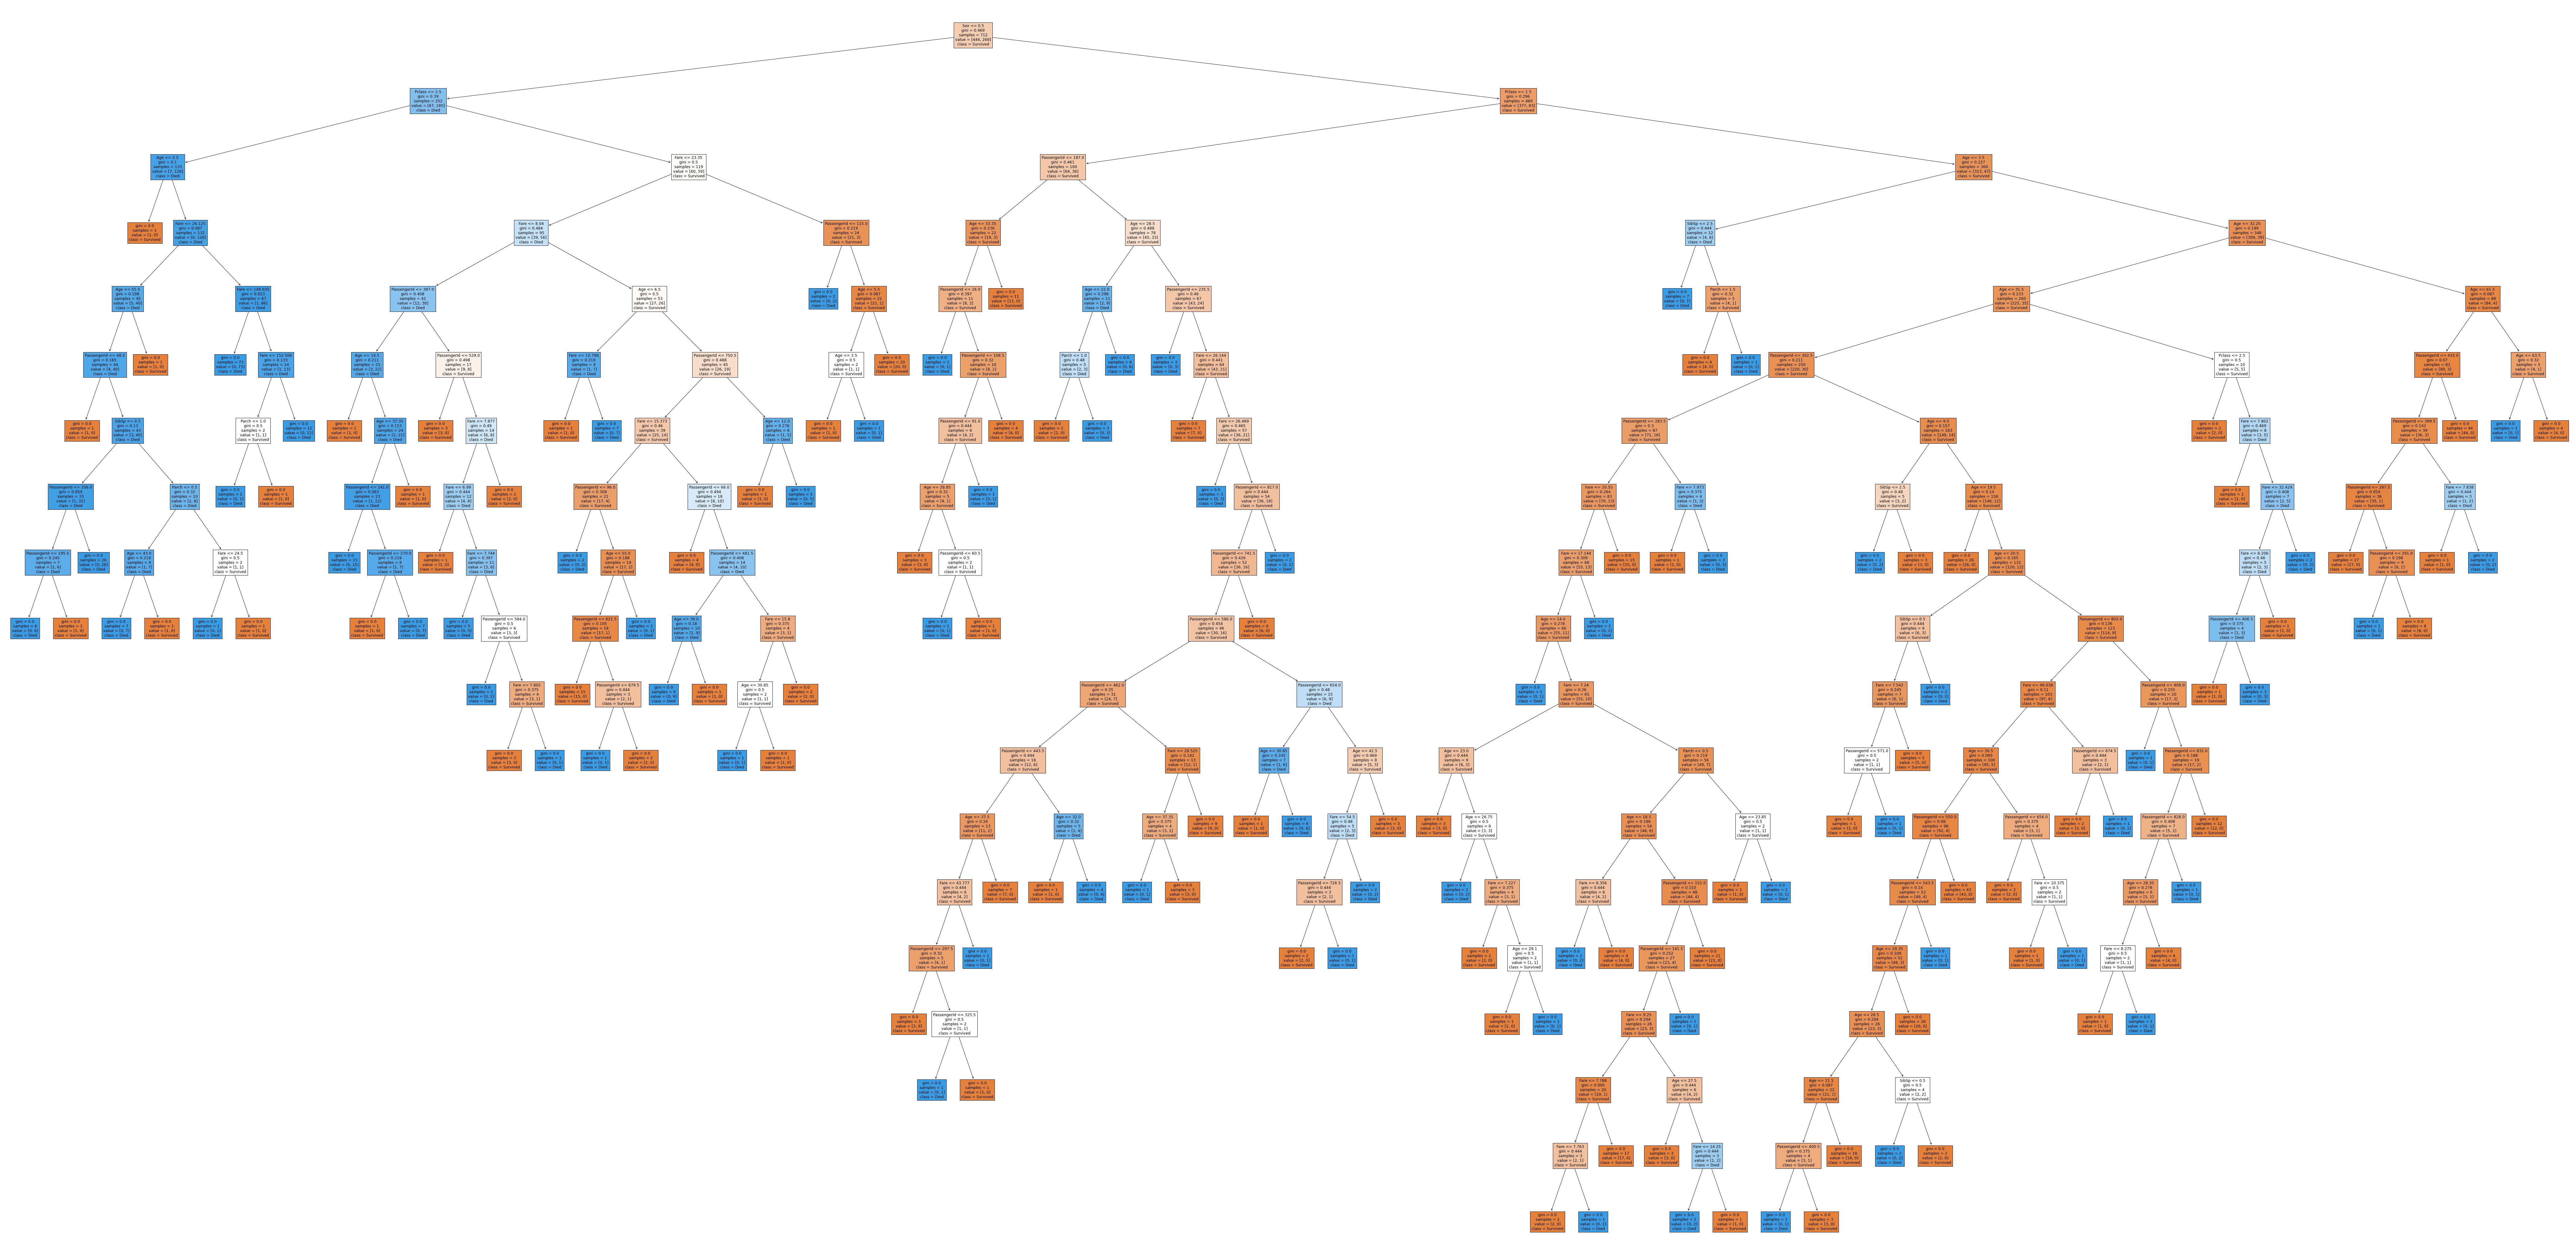

In [110]:
features_names = list(x.columns.values)
target_names = ["Survived", "Died"]

fig = plt.figure(figsize=(150, 75))
graph=tree.plot_tree(treeClassifier, 
                   feature_names=features_names,  
                   class_names=target_names,
                   filled=True)

#sauvegar la figure en png 
#fig.savefig("decistion_tree.png")

sauvegarder l'abre en fichier png

In [88]:
fig.savefig("decistion_tree.png")

## graphviz

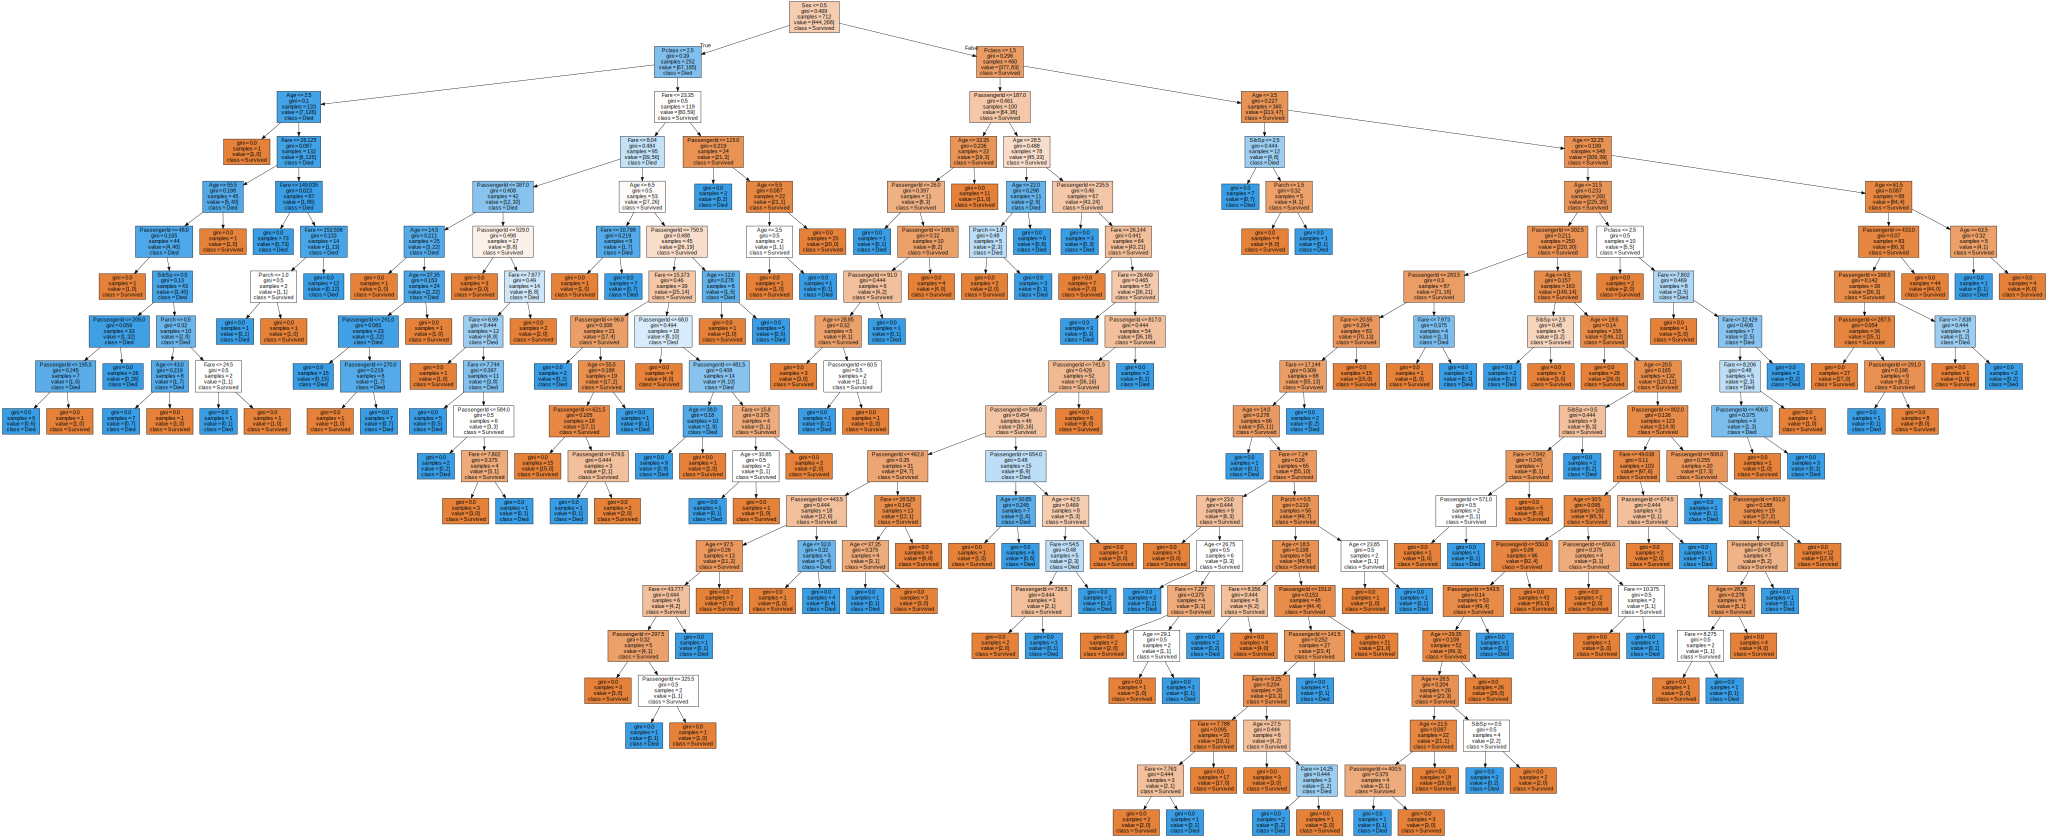

In [111]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(treeClassifier, out_file=None, 
                                feature_names=features_names,  
                                class_names=target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

sauvegarder le graph sous format png 

In [112]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

## dtreeviz 
install package with : 
```
pip install  dtreeviz

```

In [114]:
pip install  dtreeviz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 791 kB/s 


In [115]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(treeClassifier, x, y,
                target_name="Survived",
                feature_names=features_names,
                class_names=list(target_names))

viz

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


sauvegarder en format png 

In [116]:
viz.save("decision_tree.svg")

# Decision Tree Pruning Code


In [137]:
print(f'nbre noeud leaf du y_pred : {len(y_pred)}')

nbre noeud leaf du y_pred : 179


In [138]:
dtree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)

In [139]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [140]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=10, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
             random_state=None, splitter='random')

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=5,
                       splitter='random')

In [141]:
predict3 = dtree.predict(x_train)
print(f'nbre noeud leaf du predict3 : {len(predict3)}')


nbre noeud leaf du predict3 : 712


In [142]:
predict4 = dtree.predict(x_test)
print(f'nbre noeud leaf du predict3 : {len(predict4)}')

nbre noeud leaf du predict3 : 179


In [143]:
#Accuracy of the model that we created with modified model parameters.
score2 = dtree.score(x_test, y_test)
score2

0.8156424581005587